
<h1 id="Project:-Decision-Trees-and-Random-Forest---Predicting-Potential-Customers"><strong>Project: Decision Trees and Random Forest - Predicting Potential Customers</strong><a class="anchor-link" href="#Project:-Decision-Trees-and-Random-Forest---Predicting-Potential-Customers">¶</a></h1><h1 id="Marks:-30">Marks: 30<a class="anchor-link" href="#Marks:-30">¶</a></h1><p>Welcome to the project on classification using decision trees and random forests.</p>
<h2 id="Context">Context<a class="anchor-link" href="#Context">¶</a></h2><p>The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.</p>
<p>The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as <strong>leads</strong>. There are various sources of obtaining leads for Edtech companies, like</p>
<ul>
<li>The customer interacts with the marketing front on social media or other online platforms. </li>
<li>The customer browses the website/app and downloads the brochure</li>
<li>The customer connects through emails for more information.</li>
</ul>
<p>The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.</p>
<h2 id="Objective">Objective<a class="anchor-link" href="#Objective">¶</a></h2><p>ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:</p>
<ul>
<li>Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, </li>
<li>Find the factors driving the lead conversion process</li>
<li>Create a profile of the leads which are likely to convert</li>
</ul>
<h2 id="Data-Description">Data Description<a class="anchor-link" href="#Data-Description">¶</a></h2><p>The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.</p>
<p><strong>Data Dictionary</strong></p>
<ul>
<li>ID: ID of the lead</li>
<li>age: Age of the lead</li>
<li>current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'</li>
<li>first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'</li>
<li>profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)</li>
<li>website_visits: How many times has a lead visited the website</li>
<li>time_spent_on_website: Total time spent on the website</li>
<li>page_views_per_visit: Average number of pages on the website viewed during the visits.</li>
<li><p>last_activity: Last interaction between the lead and ExtraaLearn.</p>
<ul>
<li>Email Activity: Seeking details about the program through email, Representative shared information with a lead like a brochure of program, etc.</li>
<li>Phone Activity: Had a Phone Conversation with a representative, Had a conversation over SMS with a representative, etc.</li>
<li>Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc.</li>
</ul>
</li>
<li><p>print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.</p>
</li>
<li>print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.</li>
<li>digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.</li>
<li>educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.</li>
<li>referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.</li>
<li>status: Flag indicating whether the lead was converted to a paid customer or not.</li>
</ul>



<h3 id="Importing-the-necessary-libraries">Importing the necessary libraries<a class="anchor-link" href="#Importing-the-necessary-libraries">¶</a></h3>


In [1]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")



<h3 id="Import-Dataset">Import Dataset<a class="anchor-link" href="#Import-Dataset">¶</a></h3>


In [2]:
learn = pd.read_csv("ExtraaLearn.csv")


In [3]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()



<h3 id="View-the-first-and-last-5-rows-of-the-dataset">View the first and last 5 rows of the dataset<a class="anchor-link" href="#View-the-first-and-last-5-rows-of-the-dataset">¶</a></h3>


In [4]:
data.head()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.tail()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0



<h3 id="Understand-the-shape-of-the-dataset">Understand the shape of the dataset<a class="anchor-link" href="#Understand-the-shape-of-the-dataset">¶</a></h3>


In [6]:
data.shape


(4612, 15)


<ul>
<li>The dataset has <strong>4612 rows and 15 columns</strong> </li>
</ul>



<h3 id="Check-the-data-types-of-the-columns-for-the-dataset">Check the data types of the columns for the dataset<a class="anchor-link" href="#Check-the-data-types-of-the-columns-for-the-dataset">¶</a></h3>


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f


<ul>
<li><p><code>website_visits</code>, <code>time_spent_on_website</code>, <code>page_views_per_visit</code>, and <code>status</code> are of numeric type while rest columns are object type in nature.</p>
</li>
<li><p>There are <strong>no null values</strong> in the dataset.</p>
</li>
</ul>


In [8]:
# checking for duplicate values
data.duplicated().sum()


0


<ul>
<li>There are <strong>no duplicate values</strong> in the data</li>
</ul>



<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2>



<h3 id="Univariate-Analysis">Univariate Analysis<a class="anchor-link" href="#Univariate-Analysis">¶</a></h3>



<p><strong>Let's check the statistical summary of the data.</strong></p>


In [9]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000



<p><strong>Observations:</strong></p>
<ul>
<li>The average age of leads in the data is 48.5 years and the median age is 51 years. This implies that the majority of leads have good work experience and they may be looking for a shift in career or upskill themselves. </li>
<li>On average a lead visits the website 3 times. There are some leads who have never visited the website.</li>
<li>On average the leads spent 724 seconds or 12 minutes on the website. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.</li>
<li>The distribution of the average page views per visit suggests that there might be outliers in this column.</li>
</ul>


In [10]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)


ID
EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: proportion, Length: 4612, dtype: float64
--------------------------------------------------
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_med


<p><strong>Observations:</strong></p>
<ul>
<li>Most of the leads are working professions.</li>
<li>As expected, majority of the leads interacted with ExtraaLearn from the website.</li>
<li>Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively.</li>
<li>Only 2.3% of the profile completions are categorized as low.</li>
<li>49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that majority of the leads prefer to communicate via email.</li>
<li>Very few leads are acquired from print media, digital, media and referrals.</li>
</ul>


In [11]:
# checking the number of unique values
data["ID"].nunique()


4612


<ul>
<li>All the values in the case id column are unique.</li>
<li>We can drop this column.</li>
</ul>


In [12]:
data.drop(["ID"], axis=1, inplace=True)



<p><strong>Let's check how many leads have been converted</strong></p>


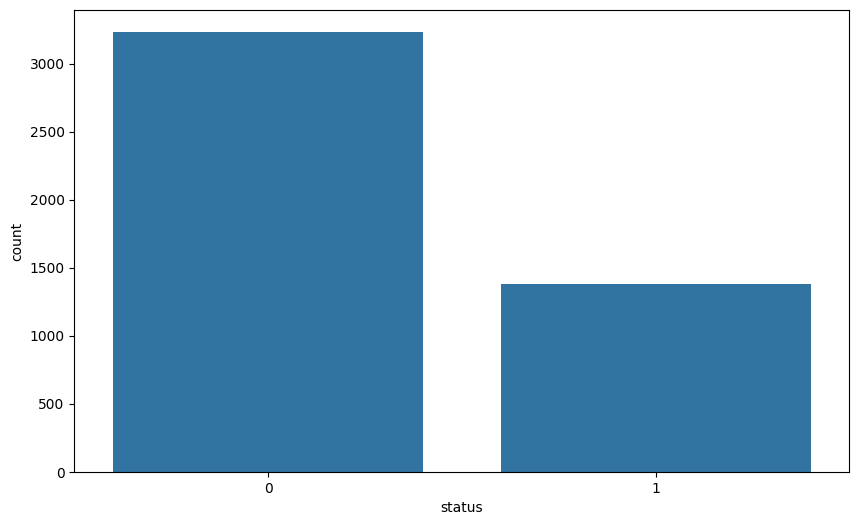

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=data)
plt.show()



<ul>
<li>The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.</li>
<li>The plot indicates that ~30% of leads have been converted.</li>
</ul>



<h4 id="Let's-check-the-distribution-and-outliers-for-numerical-columns-in-the-data">Let's check the distribution and outliers for numerical columns in the data<a class="anchor-link" href="#Let's-check-the-distribution-and-outliers-for-numerical-columns-in-the-data">¶</a></h4>



<h3 id="Question-1:-Provide-observations-for-below-distribution-plots-and-box-plots-(2-Marks)"><strong>Question 1: Provide observations for below distribution plots and box plots (2 Marks)</strong><a class="anchor-link" href="#Question-1:-Provide-observations-for-below-distribution-plots-and-box-plots-(2-Marks)">¶</a></h3>


age
Skew : -0.72


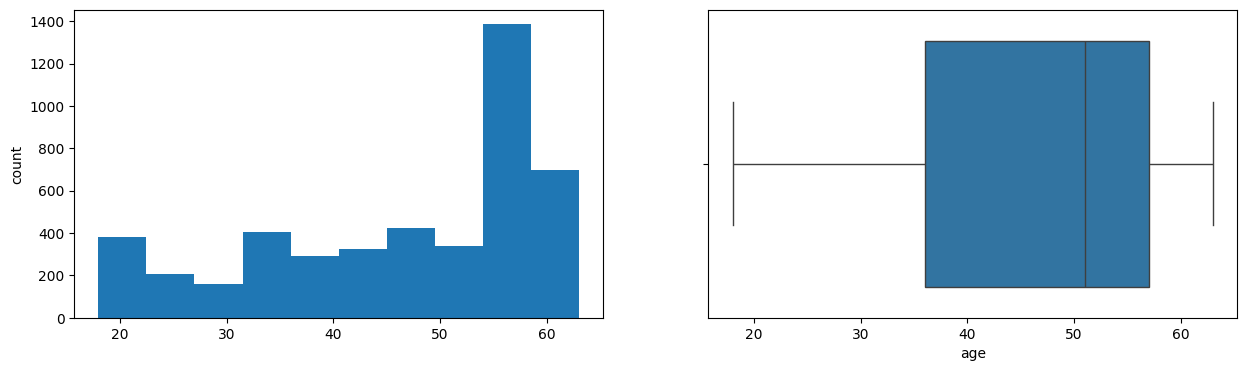

website_visits
Skew : 2.16


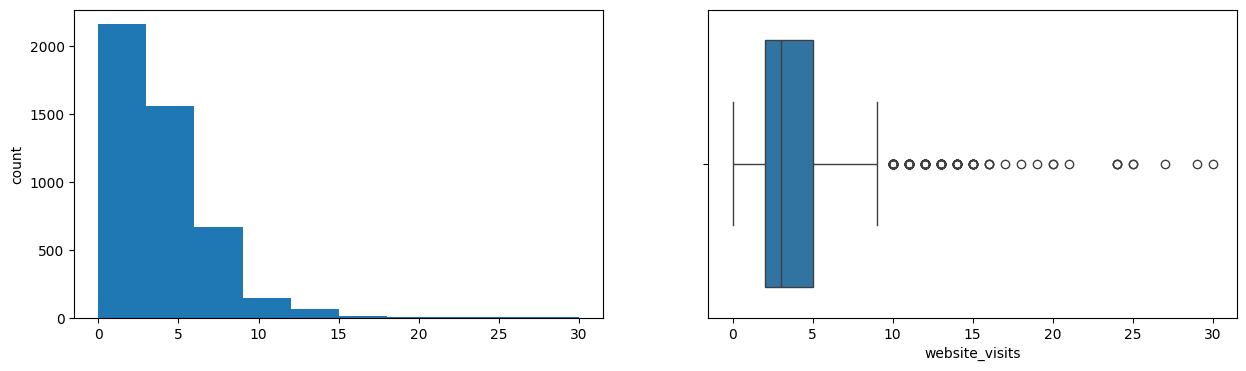

time_spent_on_website
Skew : 0.95


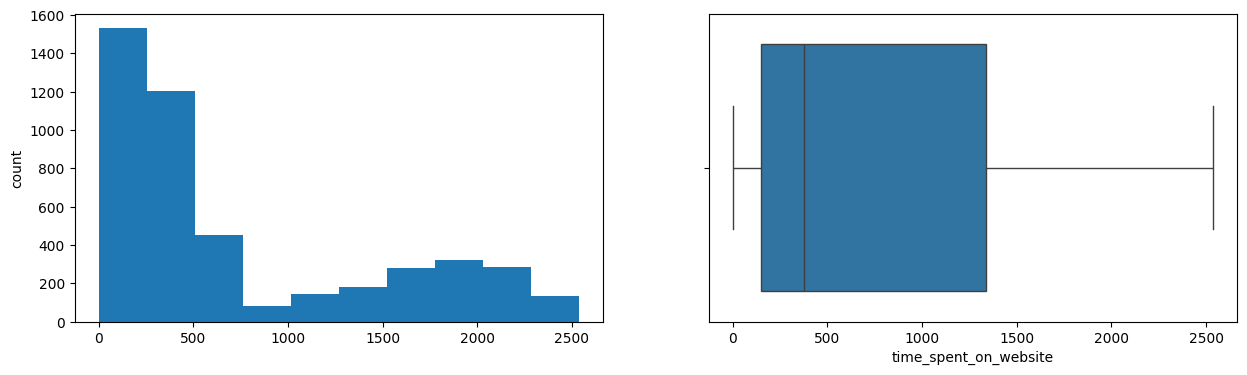

page_views_per_visit
Skew : 1.27


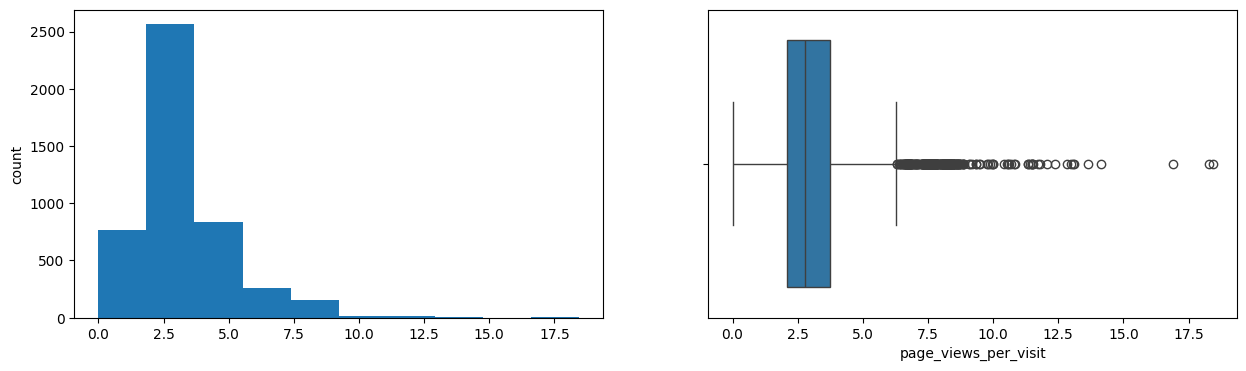

In [14]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()



<p><strong>Observations:The mean age is approximately 51.
The age ranges from about 18 to 65, with the ages of 50% of the leads coming from users aged 35-59.
The website visits variable is right skewed. 
The page views per visit variable is right skewed with manhy outliers in the upper tail as well. </strong></p>



<h3 id="Bivariate-Analysis">Bivariate Analysis<a class="anchor-link" href="#Bivariate-Analysis">¶</a></h3>



<p><strong>We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.</strong></p>
<p>Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it</p>


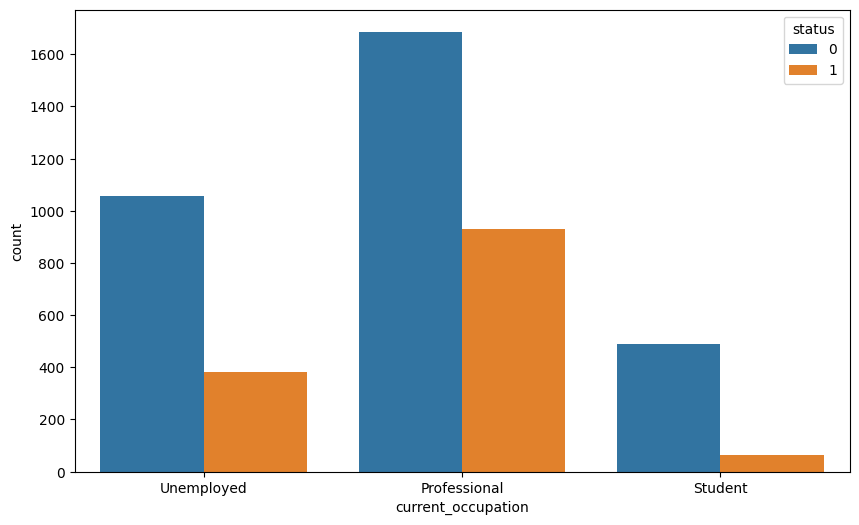

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='status', data=data)
plt.show()



<ul>
<li>The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. </li>
<li>This shows that the currently offered program is more oriented towards working professionals or unemployed personnels. The program might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in the current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.</li>
</ul>



<p><strong>Age can also be a good factor to differentiate between such leads. Let's explore this</strong></p>


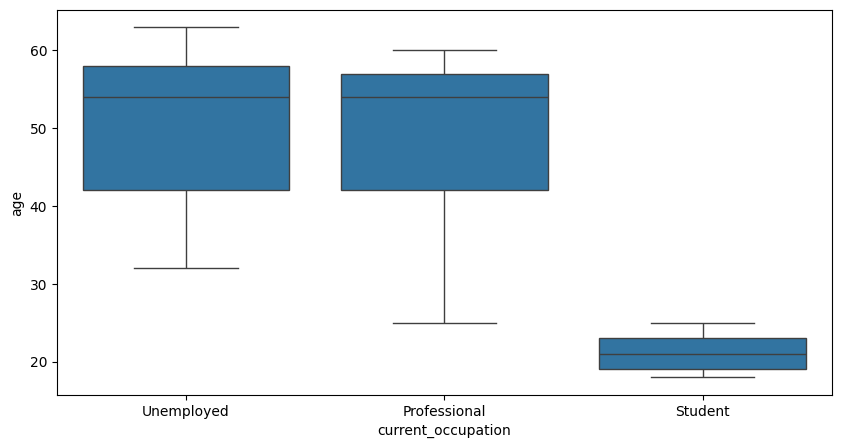

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='current_occupation', y='age', data=data)
plt.show()


In [17]:
data.groupby(["current_occupation"])["age"].describe()


,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0



<ul>
<li>The range of age for students is 18 to 25 years.</li>
<li>The range of age for professionals vary from 25 years to 60 years.</li>
<li>The currently unemployed leads have age range from 32 to 63 years.</li>
<li>The average age of working professionals and unemployed leads is almost equal to 50 years.</li>
</ul>



<p><strong>The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads</strong></p>


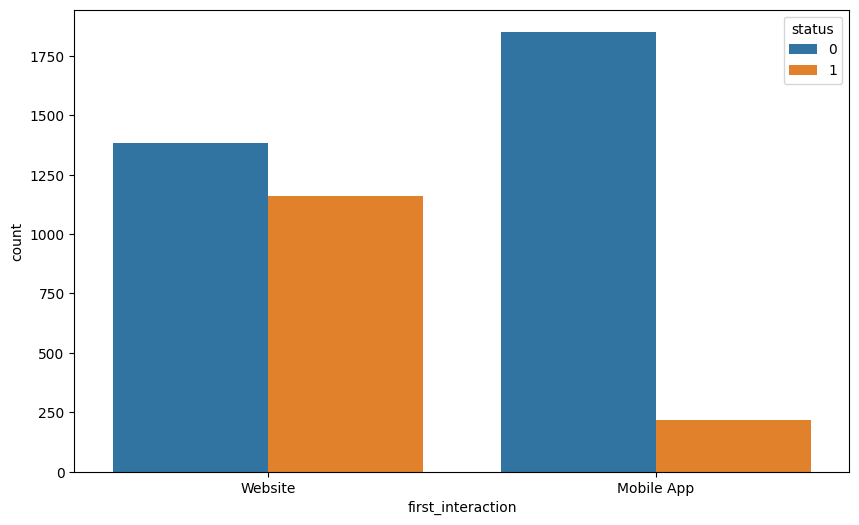

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='first_interaction', hue='status', data=data)
plt.show()



<ul>
<li>The website seems to be doing a good job as compared to mobile app as there is a huge difference in the percentage of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.</li>
<li>Majority of the leads who interacted through websites were converted to paid customers while only around a small number of the leads who interacted through mobile app converted.</li>
</ul>



<p><strong>We saw earlier that there is a positive correlation between status and time spent on the website. Let's analyze it further</strong></p>



<h3 id="Question-2:"><strong>Question 2:</strong><a class="anchor-link" href="#Question-2:">¶</a></h3><ul>
<li><strong>Create a boxplot for variables 'status' and 'time_spent_on_website'. (use sns.boxplot() function) (1 Mark)</strong></li>
<li><strong>Provide your observations from the plot (1 Mark)</strong></li>
</ul>


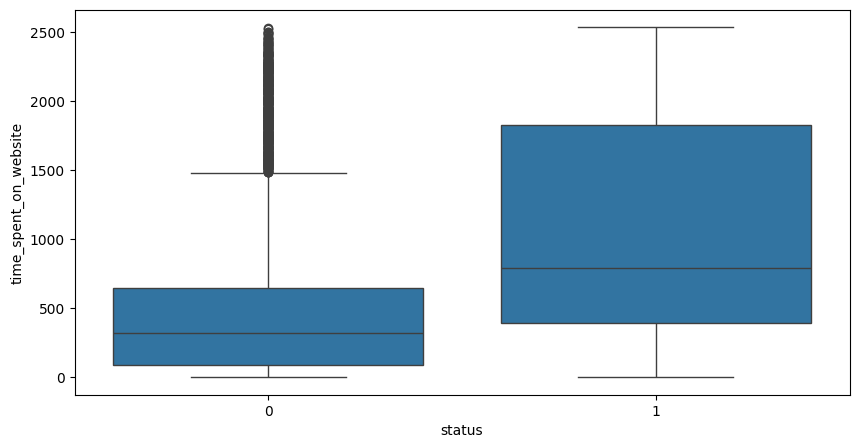

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'status', y = 'time_spent_on_website', data = data)#write your code here
plt.show()



<p><strong>Observations: Leads that did not get convervet spent less time on average on the website.</strong></p>



<p><strong>People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status</strong></p>


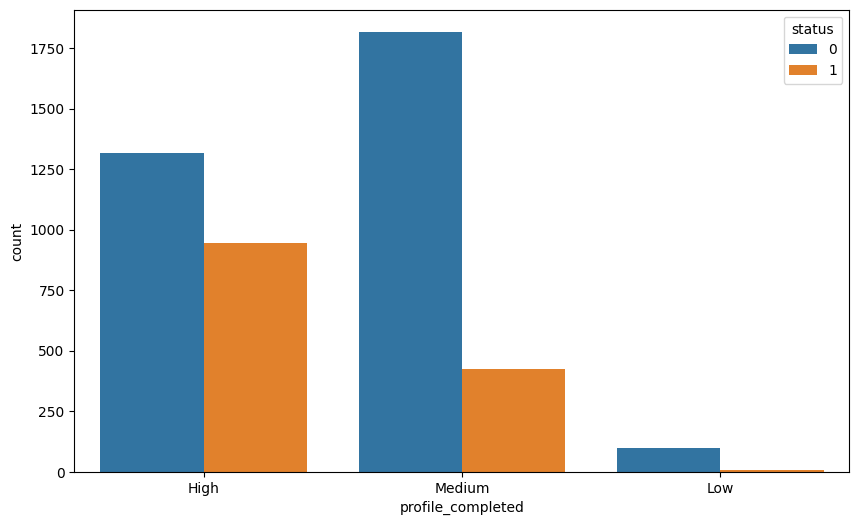

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='profile_completed', hue='status', data=data)
plt.show()



<ul>
<li>The leads who have shared their complete details with the company converted more as compared to other levels of profile completion.</li>
<li>The medium and low levels of profile completion saw comparatively very less conversions.</li>
<li>The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.</li>
</ul>



<p><strong>Referrals from a converted lead can be a good source of income with very low cost of advertisement. Let's see how referrals impacts lead conversion status</strong></p>


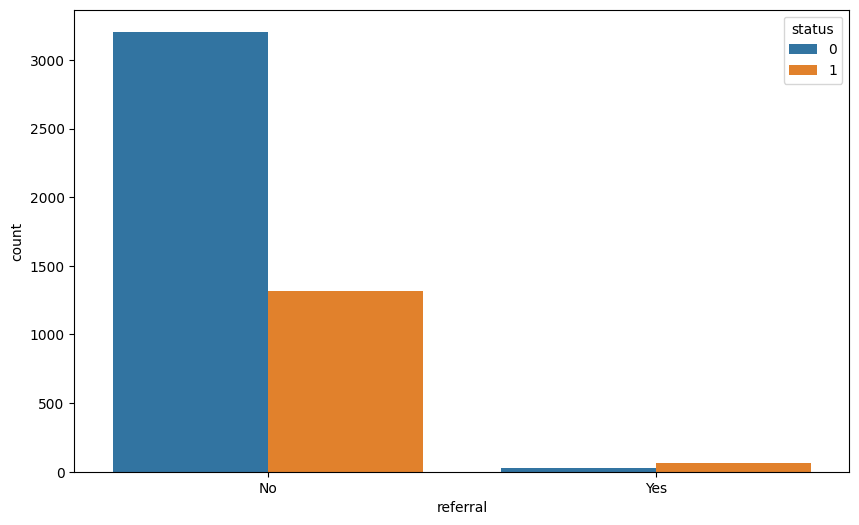

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='referral', hue='status', data=data)
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>There are very less number of referrals but the conversion percentage is high. </li>
<li>Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.</li>
</ul>



<p><strong>We have explored different combinations of variables. Now, let's see the pairwise correlations between all the numerical variables.</strong></p>


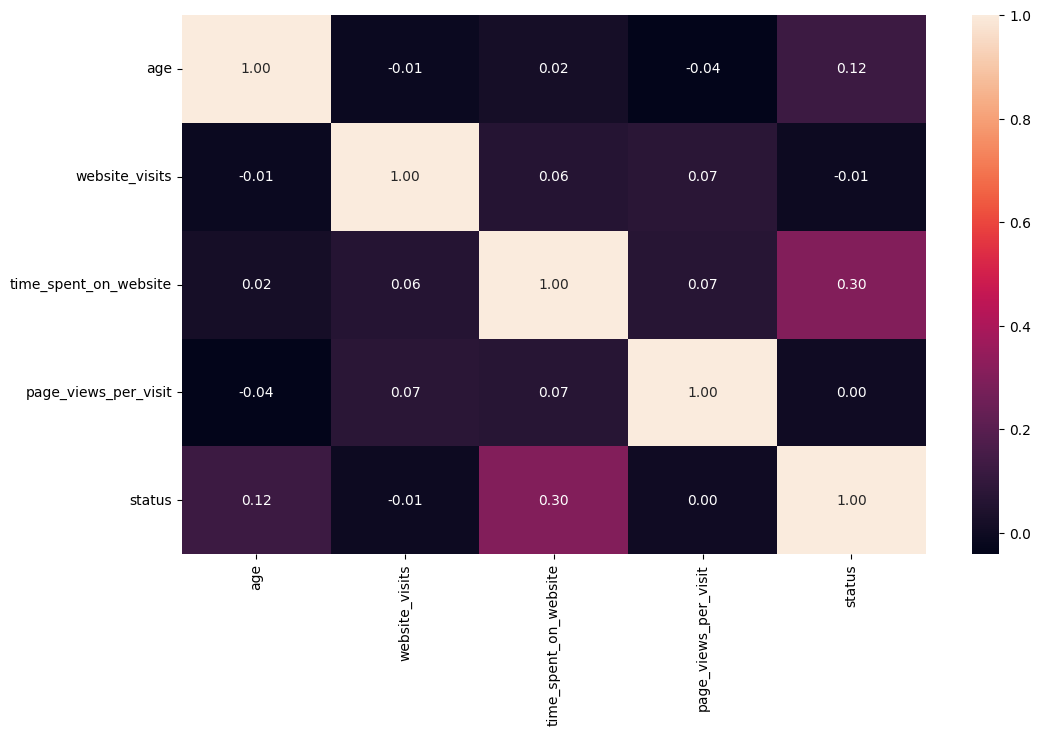

In [22]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()



<ul>
<li>There's a weak positive correlation between status and time spent on website. This implies that a person spending more time on website is more likely to bet converted. </li>
<li>There's no correlation between any independent variable.</li>
</ul>



<h3 id="Data-Preparation-for-modeling">Data Preparation for modeling<a class="anchor-link" href="#Data-Preparation-for-modeling">¶</a></h3><ul>
<li>We want to predict which lead is more likely to be converted.</li>
<li>Before we proceed to build a model, we'll have to encode categorical features.</li>
<li>We'll split the data into train and test to be able to evaluate the model that we build on the train data.</li>
</ul>


In [23]:
#Separating target variable and other variables
X=data.drop(columns='status')
Y=data['status']


In [24]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)


In [25]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)



<p><strong>Checking the shape of the train and test data</strong></p>


In [26]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64



<h2 id="Building-Classification-Models">Building Classification Models<a class="anchor-link" href="#Building-Classification-Models">¶</a></h2>



<p><strong>Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.</strong></p>
<h3 id="Model-evaluation-criterion">Model evaluation criterion<a class="anchor-link" href="#Model-evaluation-criterion">¶</a></h3><h3 id="Model-can-make-wrong-predictions-as:">Model can make wrong predictions as:<a class="anchor-link" href="#Model-can-make-wrong-predictions-as:">¶</a></h3><ol>
<li>Predicting a lead will not converted to a paid customer in reality, the lead would have converted to a paid customer.</li>
<li>Predicting a lead will converted to a paid customer in reality, the lead would not have converted to a paid customer. </li>
</ol>
<h3 id="Which-case-is-more-important?">Which case is more important?<a class="anchor-link" href="#Which-case-is-more-important?">¶</a></h3><ul>
<li><p>If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.</p>
</li>
<li><p>If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false positive cases.</p>
</li>
</ul>
<p>Losing a potential customer is a greater loss for the organization.</p>
<h3 id="How-to-reduce-the-losses?">How to reduce the losses?<a class="anchor-link" href="#How-to-reduce-the-losses?">¶</a></h3><ul>
<li>Company would want <code>Recall</code> to be maximized, greater the Recall score higher are the chances of minimizing False Negatives. </li>
</ul>



<p><strong>Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.</strong></p>


In [27]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



<h3 id="Decision-Tree">Decision Tree<a class="anchor-link" href="#Decision-Tree">¶</a></h3>



<h3 id="Question-3:"><strong>Question 3:</strong><a class="anchor-link" href="#Question-3:">¶</a></h3><ul>
<li><strong>Fit the decision tree classifier on the training data (use random_state=7) (1 Mark)</strong></li>
<li><strong>Check the performance on both training and testing data (use metrics_score function) (1 Mark)</strong></li>
<li><strong>Write your observations (2 Marks)</strong></li>
</ul>


In [28]:
#Fitting the decision tree classifier on the training data
model = tree.DecisionTreeClassifier(random_state = 7)
d_tree = model.fit(X_train, y_train)



<p><strong>Let's check the performance on the training data:</strong></p>


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



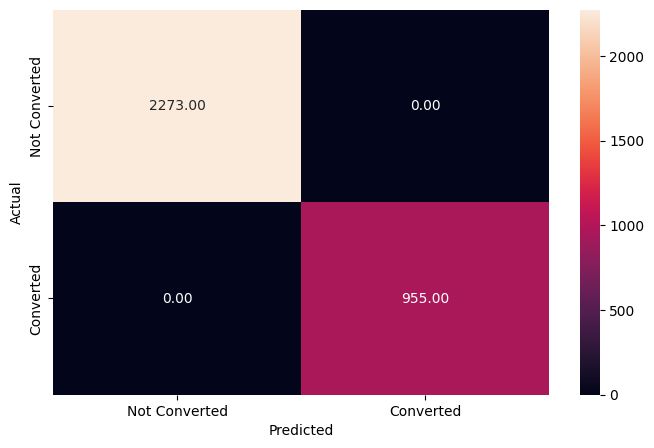

In [29]:
#Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)



<p><strong>Observations:The Decision tree perfromed with 100% on the training datase</strong></p>



<p><strong>Let's check the performance on test data to see if the model is overfitting.</strong></p>


              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



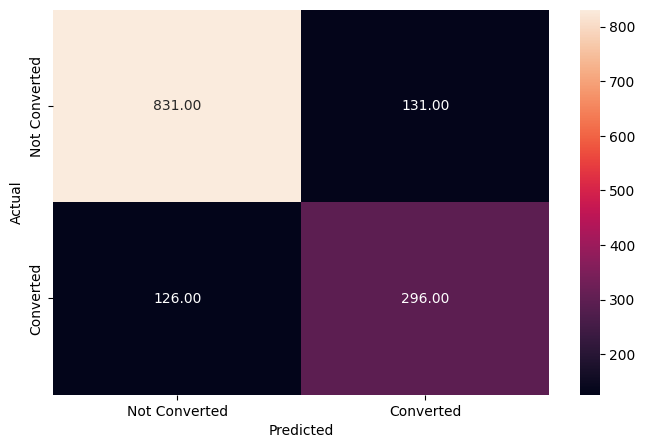

In [30]:
#Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)



<p><strong>Observations:The recall for the testing data is .70, which means the tree is over fitting. The precision of the podel suggests that there is a 31 percent the model will report a false positive. </strong></p>



<p><strong>Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth</strong> in order to reduce overfitting of the model. We can tune some other hyperparameters as well.</p>



<h3 id="Decision-Tree---Hyperparameter-Tuning"><strong>Decision Tree - Hyperparameter Tuning</strong><a class="anchor-link" href="#Decision-Tree---Hyperparameter-Tuning">¶</a></h3><p>We will use the class_weight hyperparameter with value equal to {0:0.3, 1:0.7} which is approximately the opposite of the imbalance in the original data.</p>
<p><strong>This would tell the model that 1 is the important class here.</strong></p>


In [31]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0:0.3, 1:0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)


<p>We have tuned the model and fit the tuned model on the training data. Now, <strong>let's check the model performance on the training and testing data.</strong></p>



<h3 id="Question-4:"><strong>Question 4:</strong><a class="anchor-link" href="#Question-4:">¶</a></h3><ul>
<li><strong>Check the performance on both training and testing data (2 Marks)</strong></li>
<li><strong>Compare the results with the results from the decision tree model with default parameters and write your observations (2 Marks)</strong></li>
</ul>


              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



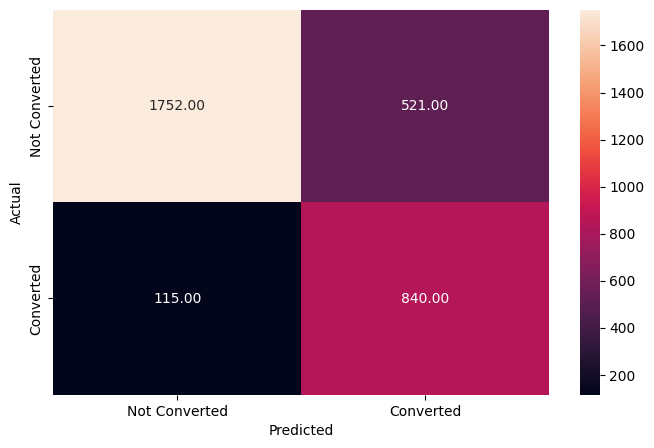

In [32]:
#Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)



<p><strong>Observations:The performance on the training data has gone down signficantly compared to the base model.</strong></p>



<p><strong>Let's check the model performance on the testing data</strong></p>


              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



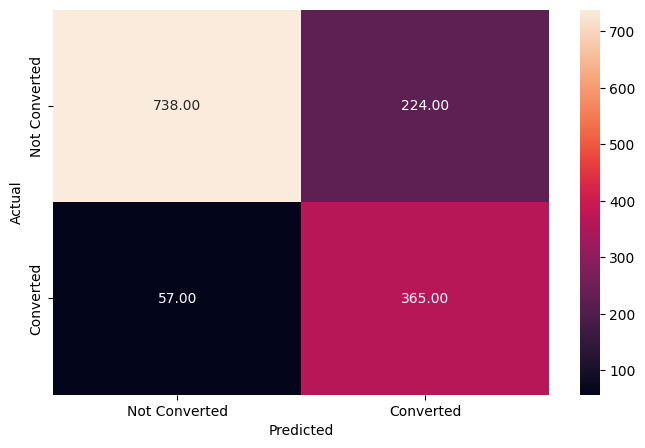

In [33]:
#Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)



<p><strong>Observations:The model still is not performing as well as the base model. Precision dropped 7 percent compared to the previous model.</strong></p>



<p><strong>Let's visualize the tuned decision tree</strong> and observe the decision rules:</p>



<h3 id="Question-5:-Write-your-observations-from-the-below-visualization-of-the-tuned-decision-tree-(3-Marks)"><strong>Question 5: Write your observations from the below visualization of the tuned decision tree (3 Marks)</strong><a class="anchor-link" href="#Question-5:-Write-your-observations-from-the-below-visualization-of-the-tuned-decision-tree-(3-Marks)">¶</a></h3>


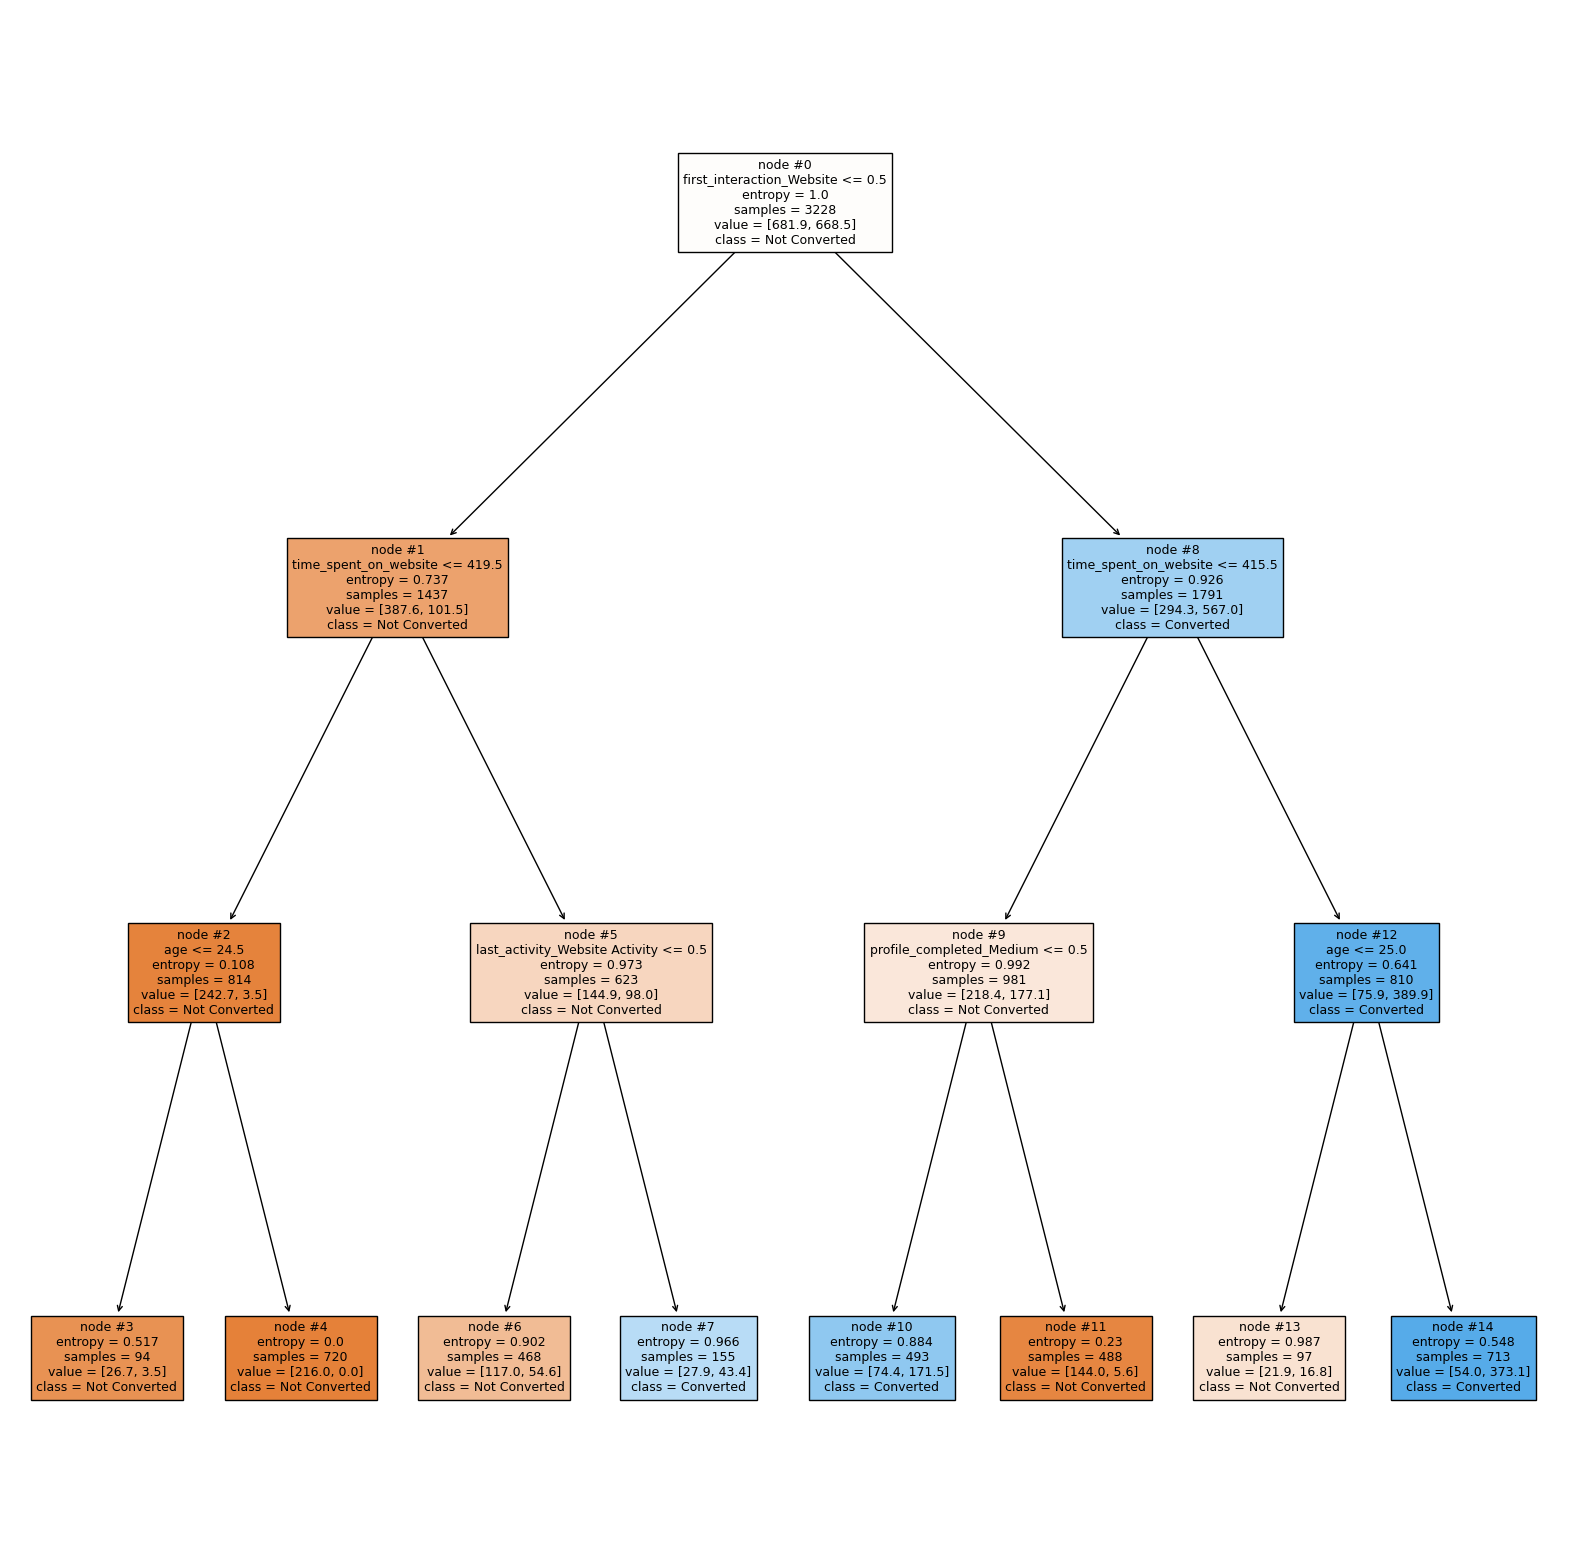

In [34]:
features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(
    d_tree_tuned,
    feature_names=features,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=["Not Converted", "Converted"],
)
plt.show()



<p><strong>Note:</strong> Blue leaves represent the converted customers i.e. <strong>y[1]</strong>, while the orange leaves represent the nont converted customers i.e. <strong>y[0]</strong>. Also, the more the number of observations in a leaf, the darker its color gets.</p>
<p>**Observations: If the lead is interacting through a website and spends a more than 415 seconds of timne on that website, and are greater than or equal to 25 years of age, they are very likely to be successfully converted.</p>



<p><strong>Let's look at the feature importance</strong> of the tuned decision tree model:</p>


In [35]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


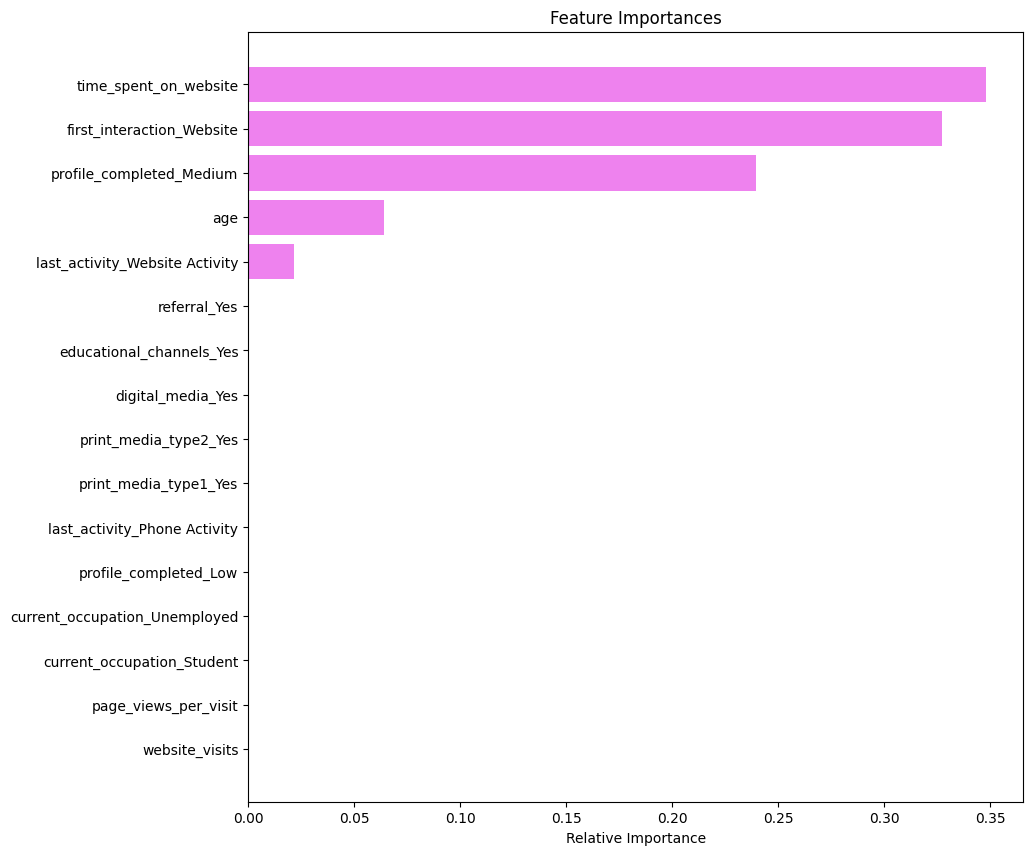

In [36]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li><strong>Time spent on the website and first_interaction_website are the most important features</strong> <strong>followed by profile_completed, age, and last_activity</strong>.</li>
<li><strong>The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not</strong>.</li>
</ul>
<p>Now let's build another model - <strong>a random forest classifier</strong></p>



<h3 id="Random-Forest-Classifier"><strong>Random Forest Classifier</strong><a class="anchor-link" href="#Random-Forest-Classifier">¶</a></h3>



<h3 id="Question-6:"><strong>Question 6:</strong><a class="anchor-link" href="#Question-6:">¶</a></h3><ul>
<li><strong>Fit the random forest classifier on the training data (use random_state=7) (1 Mark)</strong></li>
<li><strong>Check the performance on both training and testing data (use metrics_score function) (1 Mark)</strong></li>
<li><strong>Write your observations (2 Marks)</strong></li>
</ul>


In [37]:
#Fitting the decision tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7)

rf_estimator.fit(X_train, y_train)


RandomForestClassifier(random_state=7)


<p><strong>Let's check the performance of the model on the training data:</strong></p>


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



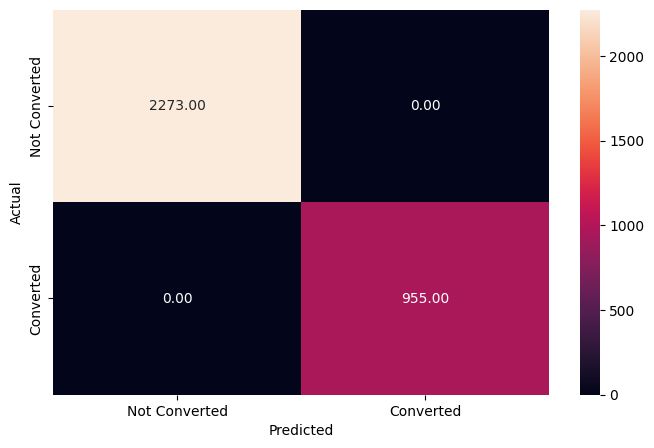

In [38]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)



<p><strong>Observations:The model performs with 100 percent accuracy.</strong></p>



<p><strong>Let's confirm this by checking its performance on the testing data:</strong></p>


              precision    recall  f1-score   support

           0       0.87      0.92      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



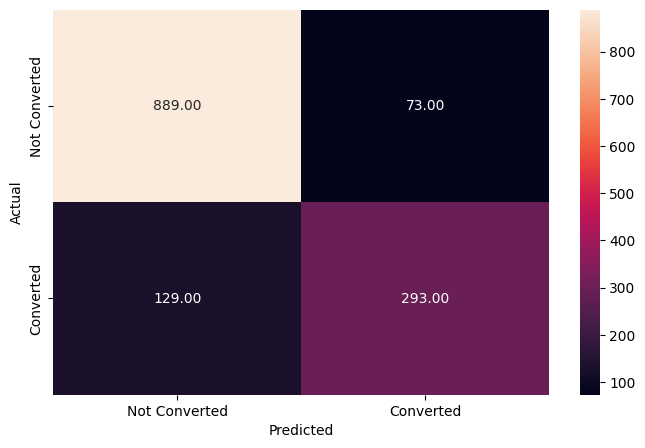

In [39]:
#Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)



<p><strong>Observations:The model performs better on the testing data than the previous model we built, but there is still slight over fitting.</strong></p>



<p><strong>Let's see if we can get a better model by tuning the random forest classifier:</strong></p>



<h3 id="Random-Forest-Classifier---Hyperparameter-Tuning"><strong>Random Forest Classifier - Hyperparameter Tuning</strong><a class="anchor-link" href="#Random-Forest-Classifier---Hyperparameter-Tuning">¶</a></h3>



<p>Let's try <strong>tuning some of the important hyperparameters of the Random Forest Classifier</strong>.</p>
<p>We will <strong>not</strong> tune the <code>criterion</code> hyperparameter as we know from hyperparameter tuning for decision trees that <code>entropy</code> is a better splitting criterion for this data.</p>


In [40]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


In [41]:
#Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



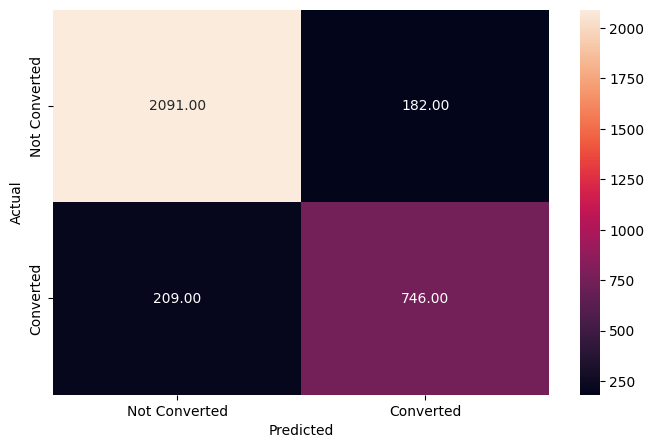

In [42]:
#Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)



<p><strong>Observations:</strong></p>
<ul>
<li>We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.</li>
<li>We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get a better performance.</li>
</ul>
<p><strong>Note:</strong> <strong>GridSearchCV can take a long time to run</strong> depending on the number of hyperparameters and the number of values tried for each hyperparameter. <strong>Therefore, we have reduced the number of values passed to each hyperparameter.</strong></p>



<h3 id="Question-7:"><strong>Question 7:</strong><a class="anchor-link" href="#Question-7:">¶</a></h3><ul>
<li><strong>Tune the random forest classifier using GridSearchCV (2 Marks)</strong></li>
<li><strong>Check the performance on both training and testing data (2 Marks)</strong></li>
<li><strong>Compare the results with the results from the random forest model with default parameters and write your observations (2 Marks)</strong></li>
</ul>


In [43]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0:0.7, 1:0.3}, "balanced", {0:0.4, 1:0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)


<p><strong>Let's check the performance of the tuned model:</strong></p>


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



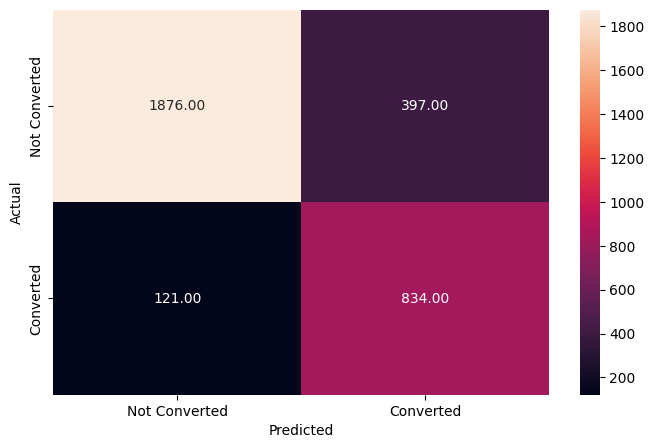

In [44]:
#Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train5)



<p><strong>Observations:The recall score has significantly improved, and the model performs well ojn the training data. The precision indicates the model is not overfitting.</strong></p>



<p><strong>Let's check the model performance on the test data:</strong></p>


              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



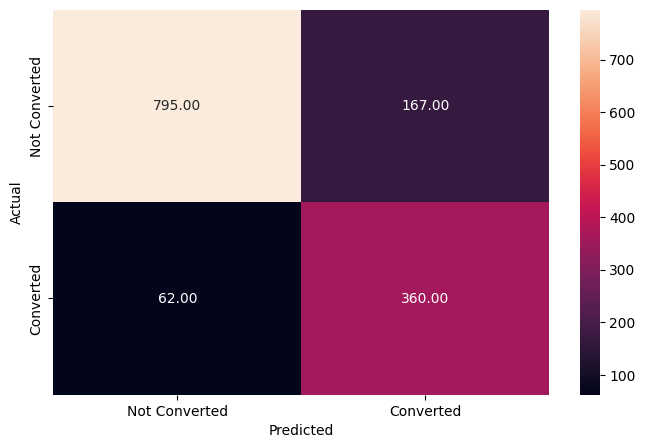

In [45]:
#Checking performance on the testing data
y_pred_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test5)



<p><strong>Observations:The model perfroms well on the testing data as well with a recall score of 85 percent. The precision is </strong></p>



<p><strong>One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importances of the model.</strong></p>


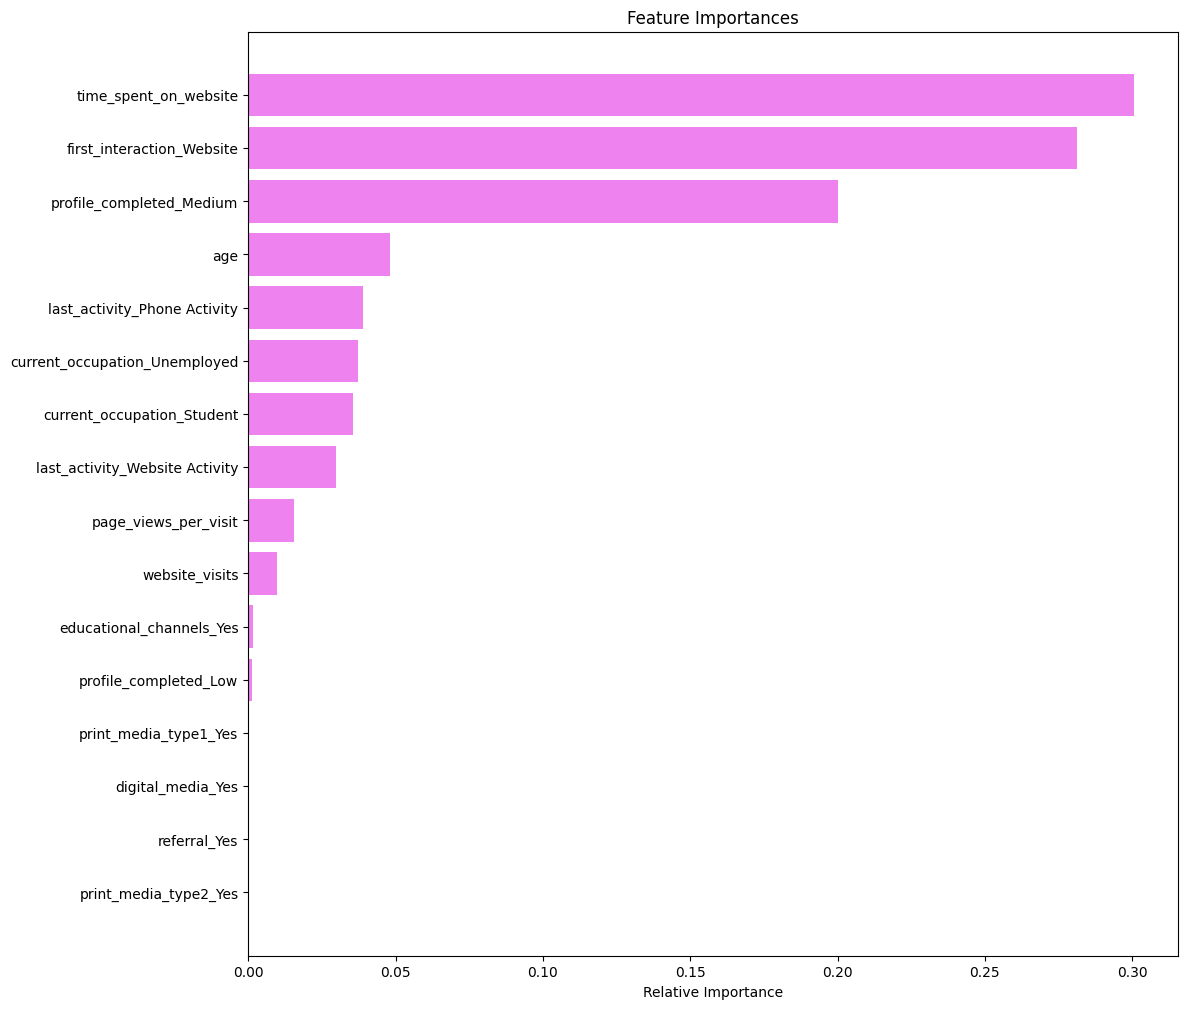

In [46]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>Similar to the decision tree model, <strong>time spent on website, first_interaction_website, profile_completed, and age are the top four features</strong> that help to distinguish between not converted and converted leads.</li>
<li>Unlike the decision tree, <strong>the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.</strong> This implies that the random forest is giving importance to more factors in comparison to the decision tree.</li>
</ul>



<h2 id="Conclusion-and-Recommendations"><strong>Conclusion and Recommendations</strong><a class="anchor-link" href="#Conclusion-and-Recommendations">¶</a></h2>



<h3 id="Question-8:"><strong>Question 8:</strong><a class="anchor-link" href="#Question-8:">¶</a></h3><p><strong>Write your conclusions on the key factors that drive the conversion of leads and write your recommendations to the business on how can they improve the conversion rate. (5 Marks)</strong></p>



<p><strong>Conclusions Important factors when determing the likelihood of lead conversion include what platform the lead is interacting on (web or app), the time spent on the site, their level of profile completion, age, wether they are student or are in their career, and others.:</strong></p>
<p><strong>Recommendations Extraalearn should focus their efforts on users who are interacting with their platform via web browser. Secondly they need to target users who are staying on the web page longer on average, are greater than 25 years old, and also leads with a medium level of profile completion:</strong></p>
